# Data Preparation (Pre-processing)

Checking folder: /home/pranali/project_skin/Smart-Skin-Analyzer-Project/new_skin_data_project/Oily-Dry-Skin-Types/test/oily
Reading image: /home/pranali/project_skin/Smart-Skin-Analyzer-Project/new_skin_data_project/Oily-Dry-Skin-Types/test/oily/oily_29b41984e97295d0516b_jpg.rf.1922c9debc6c5ccc090918d7dba6273c.jpg
Reading image: /home/pranali/project_skin/Smart-Skin-Analyzer-Project/new_skin_data_project/Oily-Dry-Skin-Types/test/oily/oily_95d97ffda2695a66531b_jpg.rf.020640c9d95feefcdef2201abc613085.jpg
Reading image: /home/pranali/project_skin/Smart-Skin-Analyzer-Project/new_skin_data_project/Oily-Dry-Skin-Types/test/oily/oily_36afa928ec0adb70016d_jpg.rf.c3f958e29480cf88cf958a17062ab2c4.jpg
Reading image: /home/pranali/project_skin/Smart-Skin-Analyzer-Project/new_skin_data_project/Oily-Dry-Skin-Types/test/oily/oily_e31f888df4e970bdc1bd_jpg.rf.92ab2928476c9581035608db9fe1f942.jpg
Reading image: /home/pranali/project_skin/Smart-Skin-Analyzer-Project/new_skin_data_project/Oily-Dry-Skin-Ty

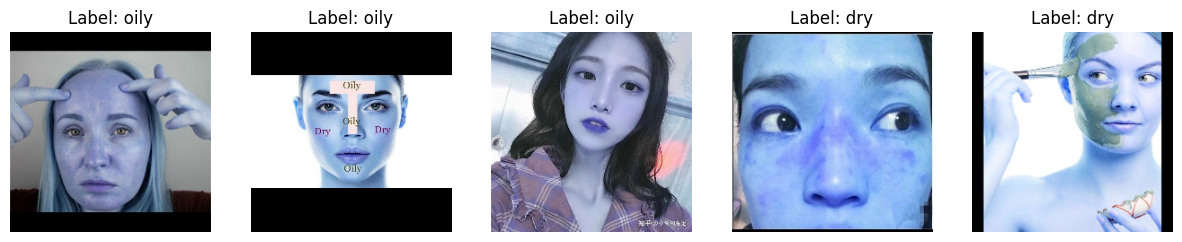

In [8]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def preprocess_images(image_folder, img_size=(224, 224)):
    images = []
    labels = []
    skin_types = {'oily': 0, 'dry': 1}  # Exclude 'hydrated'

    # Iterate over each skin type folder
    for label, index in skin_types.items():
        folder_path = os.path.join(image_folder, label)
        print(f"Checking folder: {folder_path}")
        if not os.path.isdir(folder_path):
            print(f"Warning: Folder {folder_path} does not exist.")
            continue
        # Iterate over each image in the skin type folder
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            print(f"Reading image: {img_path}")
            img = cv2.imread(img_path)
            if img is None:
                print(f"Warning: Image {img_path} could not be read.")
                continue
            img = cv2.resize(img, img_size)  # Resize image to match model input
            img = img.astype('float32') / 255.0  # Normalize pixel values
            images.append(img)
            labels.append(index)

    X = np.array(images)
    y = np.array(labels)

    if len(X) == 0:
        raise ValueError("No images found in the dataset. Check folder paths and image files.")

    # Split the dataset into training and validation sets
    return train_test_split(X, y, test_size=0.2, random_state=42)

def display_images(images, labels, num_images=5):
    skin_types = {0: 'oily', 1: 'dry'}  # Mapping from label index to skin type
    plt.figure(figsize=(15, 5))
    for i in range(min(num_images, len(images))):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {skin_types.get(labels[i], 'Unknown')}")
        plt.axis('off')
    plt.show()

# Example usage
dataset_path = '/home/pranali/project_skin/Smart-Skin-Analyzer-Project/new_skin_data_project/Oily-Dry-Skin-Types/test'  # Path to your dataset folder
X_train, X_val, y_train, y_val = preprocess_images(dataset_path)

print(f"Number of training samples: {len(X_train)}")
print(f"Number of validation samples: {len(X_val)}")

# Display a few images from the training set
display_images(X_train, y_train, num_images=5)


# Model Building and Traning (Train Model)

2024-08-24 10:18:28.520924: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-24 10:18:28.525992: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-24 10:18:28.570310: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-24 10:18:28.619531: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-24 10:18:28.665268: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

X_train shape: (60, 224, 224, 3), dtype: float32
X_val shape: (15, 224, 224, 3), dtype: float32
y_train shape: (60,), dtype: int64
y_val shape: (15,), dtype: int64


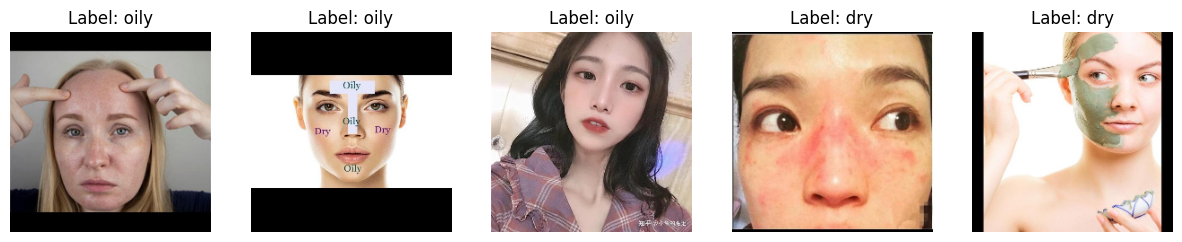

First training image shape: (224, 224, 3)
First training label: 0
First validation image shape: (224, 224, 3)
First validation label: 0
Epoch 1/10


/home/pranali/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 691ms/step - accuracy: 0.4986 - loss: 2.8280 - val_accuracy: 0.6000 - val_loss: 0.6488
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step - accuracy: 0.3910 - loss: 0.8613 - val_accuracy: 0.4000 - val_loss: 0.7875
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step - accuracy: 0.4785 - loss: 0.7205 - val_accuracy: 0.4000 - val_loss: 0.7133
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step - accuracy: 0.5236 - loss: 0.6939 - val_accuracy: 0.7333 - val_loss: 0.6746
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step - accuracy: 0.6090 - loss: 0.6791 - val_accuracy: 0.8000 - val_loss: 0.6731
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step - accuracy: 0.6715 - loss: 0.6703 - val_accuracy: 0.7333 - val_loss: 0.6652
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step - accuracy: 0.6958 - loss: 0.6566 - val_accuracy: 0.4667 - val_loss: 0.7127
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step - accuracy: 0.6750 - loss: 0.6463 - val_accuracy: 0.6667 - val_loss: 0.6567
Epo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6000 - loss: 0.6540
Validation Loss: 0.653986930847168
Validation Accuracy: 0.6000000238418579


In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Preprocess images
def preprocess_images(image_folder, img_size=(224, 224)):
    images = []
    labels = []
    skin_types = {'oily': 0, 'dry': 1}  # Excluding 'hydrated'

    for label, index in skin_types.items():
        folder_path = os.path.join(image_folder, label)
        if not os.path.isdir(folder_path):
            print(f"Warning: Folder {folder_path} does not exist.")
            continue
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is None:
                print(f"Warning: Image {img_path} could not be read.")
                continue
            img = cv2.resize(img, img_size)
            img = img.astype('float32') / 255.0
            images.append(img)
            labels.append(index)

    X = np.array(images)
    y = np.array(labels)

    if len(X) == 0:
        raise ValueError("No images found in the dataset. Check folder paths and image files.")

    return train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
def build_model(img_size=(224, 224, 3), num_classes=2):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=img_size),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to display images
def display_images(images, labels, num_images=5):
    skin_types = {0: 'oily', 1: 'dry'}  # Mapping from label index to skin type
    plt.figure(figsize=(15, 5))
    for i in range(min(num_images, len(images))):
        plt.subplot(1, num_images, i + 1)
        img = images[i]
        if img.shape[2] == 3:  # Check if image has 3 channels
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f"Label: {skin_types.get(labels[i], 'Unknown')}")
        plt.axis('off')
    plt.show()

# Example usage
dataset_path = '/home/pranali/project_skin/Smart-Skin-Analyzer-Project/new_skin_data_project/Oily-Dry-Skin-Types/test'  # Path to your dataset folder
X_train, X_val, y_train, y_val = preprocess_images(dataset_path)

# Ensure data types and shapes are correct
X_train = np.array(X_train, dtype='float32')
X_val = np.array(X_val, dtype='float32')
y_train = np.array(y_train, dtype='int')
y_val = np.array(y_val, dtype='int')

# Print shapes and types for verification
print(f"X_train shape: {X_train.shape}, dtype: {X_train.dtype}")
print(f"X_val shape: {X_val.shape}, dtype: {X_val.dtype}")
print(f"y_train shape: {y_train.shape}, dtype: {y_train.dtype}")
print(f"y_val shape: {y_val.shape}, dtype: {y_val.dtype}")

# Display a few images from the training set
display_images(X_train, y_train, num_images=5)

# Build and train the model
model = build_model(img_size=(224, 224, 3), num_classes=2)

# Check if data can be converted to TensorFlow tensors
try:
    # Ensure data is in correct format
    print(f"First training image shape: {X_train[0].shape}")
    print(f"First training label: {y_train[0]}")
    print(f"First validation image shape: {X_val[0].shape}")
    print(f"First validation label: {y_val[0]}")

    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
except Exception as e:
    print(f"An error occurred during model training: {e}")

# Save the model
model.save('skin_type_model.h5')

# Evaluate model performance
try:
    val_loss, val_accuracy = model.evaluate(X_val, y_val)
    print(f"Validation Loss: {val_loss}")
    print(f"Validation Accuracy: {val_accuracy}")
except Exception as e:
    print(f"An error occurred during model evaluation: {e}")


# Model Prediction (Predict)

X_train shape: (60, 224, 224, 3), dtype: float32
X_val shape: (15, 224, 224, 3), dtype: float32
y_train shape: (60,), dtype: int64
y_val shape: (15,), dtype: int64


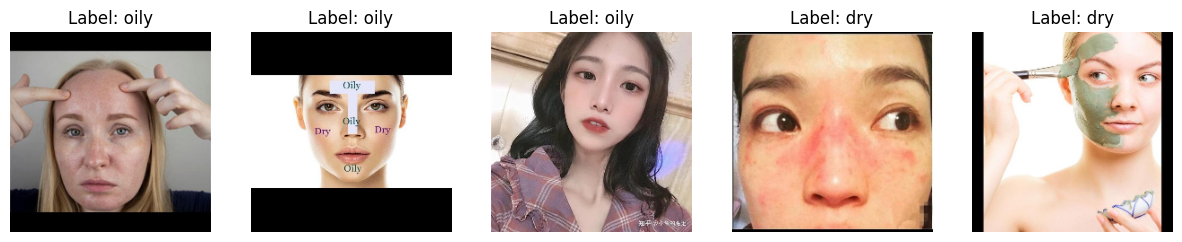

First training image shape: (224, 224, 3)
First training label: 0
First validation image shape: (224, 224, 3)
First validation label: 0
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 748ms/step - accuracy: 0.5111 - loss: 1.1106 - val_accuracy: 0.4000 - val_loss: 6.5037
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step - accuracy: 0.4785 - loss: 4.0753 - val_accuracy: 0.4000 - val_loss: 0.9176
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step - accuracy: 0.5549 - loss: 0.6973 - val_accuracy: 0.7333 - val_loss: 0.6101
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step - accuracy: 0.6194 - loss: 0.6487 - val_accuracy: 0.4000 - val_loss: 0.7783
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step - accuracy: 0.4583 - loss: 0.6909 - val_accuracy: 0.7333 - val_loss: 0.6453
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step - accuracy: 0.7278 - loss: 0.6119 - val_accuracy: 0.7333 - val_loss: 0.6252
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step - accuracy: 0.7389 - loss: 0.5786 - val_accuracy: 0.6000 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.6000 - loss: 0.5925
Validation Loss: 0.5924831032752991
Validation Accuracy: 0.6000000238418579
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


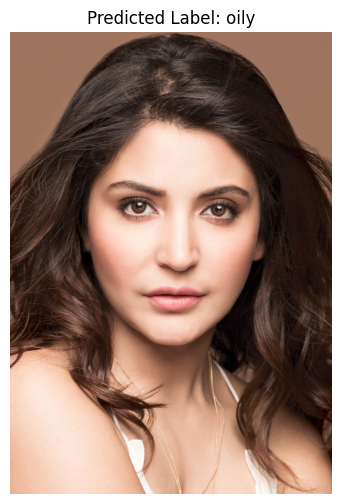

In [13]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Preprocess images
def preprocess_images(image_folder, img_size=(224, 224)):
    images = []
    labels = []
    skin_types = {'oily': 0, 'dry': 1}  # Excluding 'hydrated'

    for label, index in skin_types.items():
        folder_path = os.path.join(image_folder, label)
        if not os.path.isdir(folder_path):
            print(f"Warning: Folder {folder_path} does not exist.")
            continue
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is None:
                print(f"Warning: Image {img_path} could not be read.")
                continue
            img = cv2.resize(img, img_size)
            img = img.astype('float32') / 255.0
            images.append(img)
            labels.append(index)

    X = np.array(images)
    y = np.array(labels)

    if len(X) == 0:
        raise ValueError("No images found in the dataset. Check folder paths and image files.")

    return train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
def build_model(img_size=(224, 224, 3), num_classes=2):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=img_size),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to display images
def display_images(images, labels, num_images=5):
    skin_types = {0: 'oily', 1: 'dry'}  # Mapping from label index to skin type
    plt.figure(figsize=(15, 5))
    for i in range(min(num_images, len(images))):
        plt.subplot(1, num_images, i + 1)
        img = images[i]
        if img.shape[2] == 3:  # Check if image has 3 channels
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f"Label: {skin_types.get(labels[i], 'Unknown')}")
        plt.axis('off')
    plt.show()

# Function to predict and display an image with its label
def predict_and_display_image(model, image_path, img_size=(224, 224)):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image at {image_path} could not be read.")
    img = cv2.resize(img, img_size)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    prediction = model.predict(img)
    predicted_class = np.argmax(prediction, axis=1)[0]
    skin_types = {0: 'oily', 1: 'dry'}
    predicted_label = skin_types.get(predicted_class, 'Unknown')

    # Display the image with the predicted label
    img = cv2.imread(image_path)
    if img.shape[2] == 3:  # Check if image has 3 channels
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()

# Example usage
dataset_path = '/home/pranali/project_skin/Smart-Skin-Analyzer-Project/new_skin_data_project/Oily-Dry-Skin-Types/test'  # Path to your dataset folder
X_train, X_val, y_train, y_val = preprocess_images(dataset_path)

# Ensure data types and shapes are correct
X_train = np.array(X_train, dtype='float32')
X_val = np.array(X_val, dtype='float32')
y_train = np.array(y_train, dtype='int')
y_val = np.array(y_val, dtype='int')

# Print shapes and types for verification
print(f"X_train shape: {X_train.shape}, dtype: {X_train.dtype}")
print(f"X_val shape: {X_val.shape}, dtype: {X_val.dtype}")
print(f"y_train shape: {y_train.shape}, dtype: {y_train.dtype}")
print(f"y_val shape: {y_val.shape}, dtype: {y_val.dtype}")

# Display a few images from the training set
display_images(X_train, y_train, num_images=5)

# Build and train the model
model = build_model(img_size=(224, 224, 3), num_classes=2)

# Check if data can be converted to TensorFlow tensors
try:
    # Ensure data is in correct format
    print(f"First training image shape: {X_train[0].shape}")
    print(f"First training label: {y_train[0]}")
    print(f"First validation image shape: {X_val[0].shape}")
    print(f"First validation label: {y_val[0]}")

    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
except Exception as e:
    print(f"An error occurred during model training: {e}")

# Save the model
model.save('skin_type_model.h5')

# Evaluate model performance
try:
    val_loss, val_accuracy = model.evaluate(X_val, y_val)
    print(f"Validation Loss: {val_loss}")
    print(f"Validation Accuracy: {val_accuracy}")
except Exception as e:
    print(f"An error occurred during model evaluation: {e}")

# Example prediction
test_image_path = '/home/pranali/project_skin/Smart-Skin-Analyzer-Project/new_skin_data_project/sample.jpg'
predict_and_display_image(model, test_image_path)


# Model Evaluate 

In [14]:
import tensorflow as tf
import numpy as np
from preprocess_images import preprocess_images

def evaluate_model(model_path, dataset_path):
    # Load the model
    try:
        model = tf.keras.models.load_model(model_path)
    except Exception as e:
        print(f"Error loading model: {e}")
        return
    
    # Preprocess images to get validation data
    try:
        _, X_val, _, y_val = preprocess_images(dataset_path)
    except Exception as e:
        print(f"Error preprocessing images: {e}")
        return
    
    # Ensure X_val and y_val are in the correct format
    X_val = np.array(X_val, dtype='float32')
    y_val = np.array(y_val, dtype='int')
    
    # Evaluate the model on the validation dataset
    try:
        loss, accuracy = model.evaluate(X_val, y_val, verbose=1)
        print(f"Validation Loss: {loss:.4f}")
        print(f"Validation Accuracy: {accuracy * 100:.2f}%")
    except Exception as e:
        print(f"Error evaluating model: {e}")

# Example usage
model_path = 'skin_type_model.h5'
dataset_path = '/home/pranali/project_skin/Smart-Skin-Analyzer-Project/new_skin_data_project/Oily-Dry-Skin-Types/test'
evaluate_model(model_path, dataset_path)


Checking folder: /home/pranali/project_skin/Smart-Skin-Analyzer-Project/new_skin_data_project/Oily-Dry-Skin-Types/test/oily
Found 40 files in /home/pranali/project_skin/Smart-Skin-Analyzer-Project/new_skin_data_project/Oily-Dry-Skin-Types/test/oily
Reading image: /home/pranali/project_skin/Smart-Skin-Analyzer-Project/new_skin_data_project/Oily-Dry-Skin-Types/test/oily/oily_29b41984e97295d0516b_jpg.rf.1922c9debc6c5ccc090918d7dba6273c.jpg
Reading image: /home/pranali/project_skin/Smart-Skin-Analyzer-Project/new_skin_data_project/Oily-Dry-Skin-Types/test/oily/oily_95d97ffda2695a66531b_jpg.rf.020640c9d95feefcdef2201abc613085.jpg
Reading image: /home/pranali/project_skin/Smart-Skin-Analyzer-Project/new_skin_data_project/Oily-Dry-Skin-Types/test/oily/oily_36afa928ec0adb70016d_jpg.rf.c3f958e29480cf88cf958a17062ab2c4.jpg
Reading image: /home/pranali/project_skin/Smart-Skin-Analyzer-Project/new_skin_data_project/Oily-Dry-Skin-Types/test/oily/oily_e31f888df4e970bdc1bd_jpg.rf.92ab2928476c95810356